In [16]:
import pandas as pd
import numpy as np

In [18]:
# test
df = pd.read_pickle("data_include_y.pkl")  
df 

,open,close,high,low,volume,change,amplitude,Variance20,VR,BIAS5,MAC5,beta,residual_volatility,y_close_f1,y_change_f1
2015-01-05,10.16,10.18,10.35,9.92,450000439.0,-0.001965,0.043347,0.436818,1.762475,3.512559,0.966066,0.883844,-0.516154,10.03,0.004985
2015-01-06,10.08,10.03,10.42,9.88,340818825.0,0.004985,0.054656,0.427168,1.937771,1.050379,0.989605,0.867071,-0.565309,9.84,0.005081
2015-01-07,9.89,9.84,10.06,9.73,267460942.0,0.005081,0.033916,0.407180,1.664330,-1.583929,1.016094,0.877312,-0.599752,9.51,0.035752
2015-01-08,9.85,9.51,9.90,9.47,221459917.0,0.035752,0.045407,0.285303,1.858286,-4.201517,1.043858,0.931441,-0.606060,9.59,-0.012513
2015-01-09,9.47,9.59,10.09,9.35,394634239.0,-0.012513,0.079144,0.273035,1.815913,-2.474956,1.025378,0.905770,-0.593756,9.39,0.006390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,14.43,14.39,14.49,14.30,60322826.0,0.002780,0.013287,0.182685,0.734732,-1.788152,1.018207,-0.231336,-0.244978,14.19,0.015504
2022-05-26,14.41,14.19,14.43,14.07,101131756.0,0.015504,0.025586,0.116340,0.723723,-2.581354,1.026498,-0.251366,-0.229652,14.18,0.007757
2022-05-27,14.29,14.18,14.35,14.11,72306674.0,0.007757,0.017009,0.115850,0.631008,-1.514099,1.015374,-0.246911,-0.298685,14.08,0.012784
2022-05-30,14.26,14.08,14.28,14.04,89690123.0,0.012784,0.017094,0.058918,0.622305,-1.179113,1.011932,-0.279559,-0.308887,14.16,-0.006356


### use sk-learn

In [19]:
#coding:utf-8
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [20]:
# 1.process the data, generating X and y
df_X = df[["close","volume","change","amplitude","Variance20","VR","BIAS5","MAC5","beta","residual_volatility"]]
df_y = df[["y_change_f1"]]
data_X = df_X.to_numpy()
data_y = df_y.to_numpy().reshape(len(df_y),)
print(data_X.shape)
print(data_y.shape)

(1801, 10)
(1801,)


In [21]:
# 2.create model
model=LinearRegression()
 
# 3.train
model.fit(data_X,data_y)
print(model.predict(data_X[:4,:]))
print(data_y[:4])

[-0.00219784 -0.00239272 -0.00028086 -0.00057628]
[ 0.00498504  0.0050813   0.03575184 -0.01251303]


### use soruce code

In [22]:
# 1.process the data, generating X and y
df_X = df[["beta"]]
df_y = df[["y_close_f1"]]
data_X = df_X.to_numpy().reshape(len(df_X),)
data_y = df_y.to_numpy().reshape(len(df_y),)
print(data_X.shape)
print(data_y.shape)

(1801,)
(1801,)


In [23]:
dataset_list = []
for i in range(len(data_X)):
    dataset_list.append([data_X[i],data_y[i]])
dataset_list

[[0.883844, 10.03],
 [0.867071, 9.84],
 [0.877312, 9.51],
 [0.931441, 9.59],
 [0.90577, 9.39],
 [0.926262, 9.33],
 [0.90808, 9.41],
 [0.880779, 9.76],
 [0.878964, 9.77],
 [0.858525, 8.79],
 [1.058321, 8.79],
 [0.976526, 9.17],
 [0.902664, 9.09],
 [0.887425, 9.15],
 [0.865478, 9.12],
 [0.828348, 8.89],
 [0.846787, 8.94],
 [0.791335, 8.84],
 [0.78769, 8.85],
 [0.730177, 8.66],
 [0.733019, 8.87],
 [0.712612, 8.71],
 [0.726328, 8.77],
 [0.695793, 8.59],
 [0.678572, 8.59],
 [0.671894, 8.75],
 [0.668048, 8.73],
 [0.649901, 8.81],
 [0.657438, 8.87],
 [0.650669, 8.85],
 [0.629223, 8.89],
 [0.625337, 8.77],
 [0.653585, 8.94],
 [0.636765, 8.89],
 [0.631225, 8.92],
 [0.596458, 8.64],
 [0.647018, 8.63],
 [0.626466, 8.51],
 [0.635546, 8.54],
 [0.601331, 8.99],
 [0.698506, 8.75],
 [0.702088, 8.81],
 [0.702179, 9.28],
 [0.732232, 9.53],
 [0.770177, 9.8],
 [0.775007, 9.79],
 [0.719281, 9.86],
 [0.651926, 9.66],
 [0.6581, 9.74],
 [0.640444, 9.81],
 [0.560793, 9.76],
 [0.565872, 9.48],
 [0.57725, 9.6],


In [24]:
# lost function
def linear_loss(w,b,data):
    x = data[:,0]
    y = data[:,1]
    
    # computer loss function
    loss = np.sum((y - w * x - b) ** 2) / data.shape[0]
    
    return loss

In [25]:
# gradient descent
def linear_gradient(w,b,data,lr):
    N = float(len(data))
    x = data[:,0]
    y = data[:,1]
    
    # computer derivative
    dw = np.sum(x * (y - (w * x + b))) * (-2) / (N)
    db = np.sum(y - (w * x + b)) * (-2) / (N)
    
    # update param w and b with learning rate
    w = w - (lr * dw)
    b = b - (lr * db)
    
    return w,b

In [26]:
# iteration
def linear_iteration(data,w,b,lr,epcoh):
    for i in range(epcoh):
        w,b = linear_gradient(w,b,data,lr)
        if i % 100 == 0:
            print("epoch {0}: loss = {1}".format(i,linear_loss(w,b,data)))
    
    return w,b

In [27]:
# draw
def plot_data(data,w,b):
    x = data[:,0]
    y = data[:,1]
    y_predict = w * x + b
    plt.plot(x,y,"o")
    plt.plot(x,y_predict,"k-")
    plt.show()

In [28]:
# linear regression():
def linear_regression(data):
    x = data[:,0]
    y = data[:,1]
    plt.plot(x,y,"o")
    plt.show()
    
    # initialize param
    lr = 0.01 # learning rate
    epoch = 1000 # training times
    w = 0.0 # initial w
    b = 0.0 # initial b
    
    # show initial param
    print ("initial param:\n ini_b = {0}\n ini_w = {1}\n loss of begin = {2}\n " \
          .format(b,w,linear_loss(w,b,data)))
    
    # training
    w,b = linear_iteration(data,w,b,lr,epoch)
    
    # show final result
    print ("final param:\n ini_b = {0}\n ini_w = {1}\n loss of begin = {2}\n " \
          .format(b,w,linear_loss(w,b,data)))
    
    # show picture
    plot_data(data,w,b)

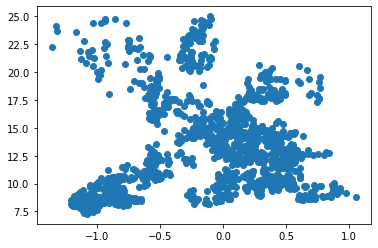

initial param:
 ini_b = 0.0
 ini_w = 0.0
 loss of begin = 178.33361526929488
 
epoch 0: loss = 171.75280615174123
epoch 100: loss = 21.58766497245567
epoch 200: loss = 17.168616279321636
epoch 300: loss = 16.38691085989068
epoch 400: loss = 16.172655469235455
epoch 500: loss = 16.11245723828774
epoch 600: loss = 16.0955252061895
epoch 700: loss = 16.09076248698589
epoch 800: loss = 16.08942280486133
epoch 900: loss = 16.08904597215762
final param:
 ini_b = 13.20893475750585
 ini_w = 2.1698797902079496
 loss of begin = 16.088940504243634
 


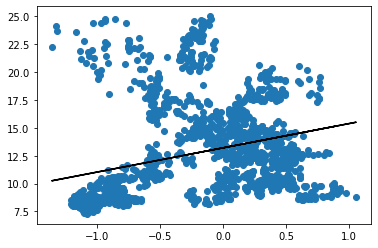

In [29]:
if __name__ == "__main__":
    #original_list = [[1,3],[2,4],[3,6],[4,5],[5,8],[6,9]]
    original_list = dataset_list
    data = np.array(original_list)
    linear_regression(data)